In [1]:
!pip install -q groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 2.7 MB/s eta 0:00:00


We will be using [Groq Cloud's](https://console.groq.com/playground) hosted models in this tutorial. You can can access these models for free using the Groq python APIs.

Go to the above mentioned link and create an account to generate the API key.

In [11]:
from google.colab import userdata
import os
from groq import Groq

os.environ['GROQ_API_KEY'] = userdata.get('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')

SecretNotFoundError: Secret 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 does not exist.

## Introduction

Prompt -> LLM -> Completion

### What is an LLM API

An **LLM API** (Large Language Model Application Programming Interface) is a service that allows developers to interact with a pre-trained language model hosted by a provider. It processes a **prompt** (user input) and generates a **completion** (model's response) based on the task it has been designed for, such as text generation, summarization, or question answering.

---

### Prompt:

A **prompt** is the input text provided to the language model to elicit a response. It can include instructions, context, or examples to guide the model's output. A well-crafted prompt improves the relevance and quality of the completion.

---

### Completion:

A **completion** is the output generated by the language model in response to the provided prompt. It can range from a single word to detailed paragraphs, depending on the context and the token limits of the model.

---

### Context window and max output tokens:

#### **Context window**:
The **context window** represents the maximum number of tokens (words or subword units) that the model can process in a single interaction, including both the prompt and completion.

- **GPT-3.5 Turbo**: About 16k tokens  
- **GPT-4, 4o**: Up to 128k tokens  
- **Claude 3.5 (Haiku, Sonnet)**: Up to 200k tokens  
- **Llama 3.1, 3.2**: Up to 128k tokens  

#### **Max output tokens**:

The **max output tokens** specify the maximum number of tokens that the model will generate as part of its completion. The max output tokens are typically limited by the context window size minus the length of the input prompt. For example:

- If the context window is 16k tokens and the input prompt is 6k tokens, the model can generate up to 10k tokens in its completion.  



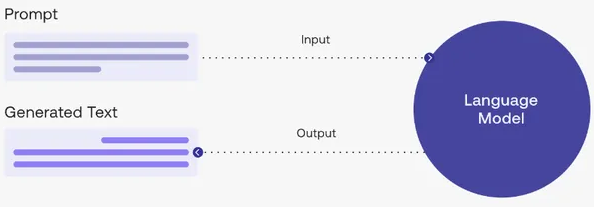

Groq API documentation: https://console.groq.com/docs/api-reference#chat

In [8]:
client = Groq()
completion = client.chat.completions.create(
    model="llama3-8b-8192",
    messages=[
        {
            "role": "user",
            "content": "hi"
        }
    ],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=False,
    stop=None
)

## streaming output
# for chunk in completion:
#     print(chunk.choices[0].delta.content or "", end="", flush=True)

response = completion.choices[0].message.content
print(response)

GroqError: The api_key client option must be set either by passing api_key to the client or by setting the GROQ_API_KEY environment variable

Helpful parameters

1. **model**: Specifies which model to use.
2. **messages**: Contains the chat history so the model understands context.
3. **temperature**: Controls randomness; higher is more creative, lower is more focused.
4. **max_tokens**: Limits response length.
5. **top_p**: Narrows model choices to the most likely responses.
6. **frequency_penalty**: Reduces repeated phrases in the response.
7. **presence_penalty**: Encourages discussing new topics.
8. **stream**: Sends the response in real-time chunks as it generates.
9. **stop**: Defines sequences that stop the model's response.



In [ ]:
# system prompt

client = Groq()
completion = client.chat.completions.create(
    model="llama3-8b-8192",
    messages=[
        {
            "role": "system", # instructions to follow while generating
            "content": "You are a helpful assistant"
        },
        {
            "role": "user",
            "content": "How to overcome stress"
        }
    ],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=False,
    stop=None
)

## streaming output
# for chunk in completion:
#     print(chunk.choices[0].delta.content or "", end="", flush=True)

response = completion.choices[0].message.content
print(response)

Overcoming stress requires a combination of self-care, lifestyle changes, and stress-reducing techniques. Here are some strategies to help you manage stress:

1. **Identify your stressors**: Take some time to reflect on what causes you stress. Is it work, relationships, or something else? Once you know what's causing your stress, you can start working on ways to address it.
2. **Exercise regularly**: Physical activity is a great stress-reliever. Try going for a walk, jog, or bike ride, or doing some yoga or strength training. Exercise can help reduce stress hormones like cortisol and adrenaline.
3. **Practice relaxation techniques**: Techniques like deep breathing, progressive muscle relaxation, and visualization can help calm your mind and body. You can find many guided relaxation exercises online or through mobile apps.
4. **Get enough sleep**: Lack of sleep can exacerbate stress. Aim for 7-9 hours of sleep per night and establish a consistent bedtime routine to improve sleep quality

Hellucination in LLMs

## Prompt Engineering
**Part 1**
- Zero shot, one shot, few shot
- Chain of thoughts

In [ ]:
def get_response_from_groq(system_role, user_message, **kwargs):
    client = Groq()

    model = kwargs.get("model", "llama3-8b-8192")
    temperature = kwargs.get("temperature", 1)
    max_tokens = kwargs.get("max_tokens", 1024)
    top_p = kwargs.get("top_p", 1)
    stop = kwargs.get("stop", None)
    # stream = kwargs.get("stream", True)

    messages = [
        {
            "role": "system",
            "content": system_role
        },
        {
            "role": "user",
            "content": user_message
        }
    ]

    completion = client.chat.completions.create(
          model=model,
          messages=messages,
          temperature=temperature,
          max_tokens=max_tokens,
          top_p=top_p,
          # stream=stream,
          stop=stop
      )

    # if stream:
    #   print("streaming")
    #   yield from (chunk.choices[0].delta.content or "" for chunk in completion)
    # else:
    #   response = completion.choices[0].message.content
    #   yield response

    response = completion.choices[0].message.content
    return response

In [ ]:
# Zero shot
system_role = "Output only the location name in a JSON format"
user_message = "what is the capital of India?"

response = get_response_from_groq(system_role, user_message,)

print(response)


The capital of India is New Delhi.


In [ ]:
# One shot
system_role = """Output only the location name in a JSON format.
Examples:
User: What is the capital of India?
Assistant: {
    "location": "New Delhi"
}"""


user_message = "What is the capital of UK?"

response = get_response_from_groq(system_role, user_message)

print(response)

{
    "location": "London"
}


In [ ]:
# Few shot prompting
system_role = """True or False
Examples: A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.
The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: Adding all the odd numbers (17, 19) gives 36. The answer is True.
The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: Adding all the odd numbers (11, 13) gives 24. The answer is True.
The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: Adding all the odd numbers (17, 9, 13) gives 39. The answer is False.
"""

user_message = """The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. """

response = get_response_from_groq(system_role, user_message)

print(response)

Let's add up the odd numbers in the group: 15 + 5 + 13 + 7 + 1 = 41.

Since 41 is an odd number, the statement "The odd numbers in this group add up to an even number" is actually FALSE.


In [ ]:
# Chain of thoughts Prompting

system_role = """True or False
Let's think step by step and perform math step wise"""

user_message = """The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1."""

response = get_response_from_groq(system_role, user_message, temperature=0)

print(response)

Let's identify the odd numbers in the group:

* 15
* 5
* 13
* 7
* 1

Now, let's add them up:

15 + 5 = 20
20 + 13 = 33
33 + 7 = 40
40 + 1 = 41

The sum of the odd numbers is 41, which is an odd number, not an even number.

So, the statement is FALSE.


Other useful techniques:
  - Self-Consistency [link-1](https://www.promptingguide.ai/techniques/consistency) [link-2](https://learnprompting.org/docs/intermediate/self_consistency)
  - Tree of Thoughts (ToT) [link](https://www.promptingguide.ai/techniques/tot)

### Task

### Extract structured information from SMS data

You need to build a tool that can extract the following details from the mobile message data:
- Date
- Sender (str) Swiggy, Zomato, ICICI etc.
- Type (str) otp message, promotion, scam, credit, debit, recharge etc.
- Amount (str)
- Severity (str) low, medium and high. (Messages that are uncommon/ need urgent action/ money debited, etc)
- short description

NOTE: Add more categories as needed.
Personal or confidential information such as email, otp, username, password, number etc should not be persent in the output.

In [ ]:
# Load dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("dshah1612/sms-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dshah1612/sms-data/versions/1


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(path + "/SMS-Data.csv")

data.head()[["senderAddress","text"]].to_dict(orient="records")

[{'senderAddress': 'JK-SmplPL',
  'text': 'Rs.95.15 on Zomato charged via Simpl.\r\n--\r\nFood, groceries, commute, or medicines. Buy Now, Pay Later via Simpl. Know More: https://click.getsimpl.com/vyhm/5b611f85\r\n-\r\nSimpl Pay'},
 {'senderAddress': 'VP-ViCARE',
  'text': 'Hi! Update your email id through WhatsApp: https://wa.me/message/SIAJ2QKMIOVEI1 or head to Vi App https://bit.ly/371QhWe. This will help as ID verification in case of any SIM related needs.\n\n\n'},
 {'senderAddress': 'VP-612345',
  'text': 'Lucknow ya Kolkata ? - watch it LIVE with Vi cricket pack  RC 499 - 2GB/day+Unlimited Calls+1year Disney+ Hotstar mobile pack. https://bit.ly/VHST1\n'},
 {'senderAddress': 'BP-ACKOGI',
  'text': 'Mohd,\nCheck the incredible Acko insurance policy you just bought on Zomato, and add a nominee to it here https://acko.in/t/zwWJOO Save this link for quick access to your policy.'},
 {'senderAddress': 'VP-ViCARE',
  'text': 'Hi! You can now get your Vi prepaid invoice emailed to you, s

### Chatbot

Create a chatbot application with the following features:

1. **Initialization**: Start with a system-defined prompt (e.g., "You are a helpful assistant").  
2. **Message Handling**: Maintain a conversation history and respond to user inputs.  
3. **Reset**: Include a command to clear the conversation history.  
4. **Custom Settings**: Allow adjustment of model settings like response creativity and length.  
5. **CLI Interface**: Build a simple interface where:
   - Users can type messages.
   - "exit" ends the chat, and "clear" resets the history.  
6. **Error Handling**: Handle unexpected inputs gracefully.  

You can make this a CLI application.

In [ ]:
!ls

chatapp.py  __pycache__  sample_data


In [ ]:
from chatapp import ChatApp

In [ ]:
app = ChatApp("You answer only in bullet points")

Enter 'exit' to end the conversation.
Enter 'clear' to reset the conversation.


In [ ]:
app.run()

User: Hi
ChatBot: • Hi! How can I assist you today?

User: Goof
ChatBot: • You just goofy!

User: clear
Chat history cleared.
User: exit
